# Blatt 5

## Aufgabe 1 Fourier Filter

Ein gemessenes (Zeit-)Signal enth ̈alt mehrere Frequenzen. Duch Anwendung eines Filters im
Frequenzspetrum (Fourier-Filter) k ̈onnen die einzelnen Frequenzen herausgefilter werden. Als
Beispiel soll die Daten [1] verwendet werden

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### a) Schreibe ein Python-Programm, das (analog zur Vorlesung) Daten einliest und das (Fourier-)Spektrum berechnet. 
Welche Frequenzen sind mit welchen Amplituden im den
Beispieldaten vertreten? Wie stark ist das Rauschen?

Text(0, 0.5, 'Amplitude')

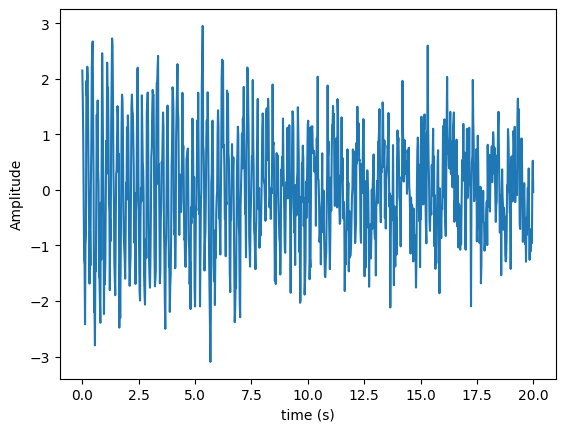

In [2]:
data = np.loadtxt('sample-data.dat')

plt.plot(data[:,0], data[:,1])
plt.xlabel('time (s)')
plt.ylabel('Amplitude')

/home/emil/.local/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


Text(0, 0.5, 'intensity')

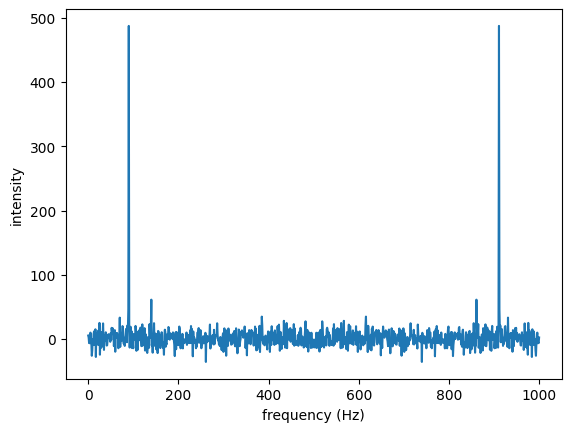

In [3]:
# fourier transform
data_fft = np.fft.fft(data[:,1])
plt.plot(data_fft)
plt.xlabel('frequency (Hz)')
plt.ylabel('intensity')

The frequency at ~90 Hz and at 920 Hz are the most significant. The noise is very strong.

### b) Erweitere das Programm, so dass es im Frequenzbereich einen Filter anwenden kann.
Implementiere einen Hoch-, einen Tief- und einen Bandpass-Filter um die Frequenzen zu
isolieren

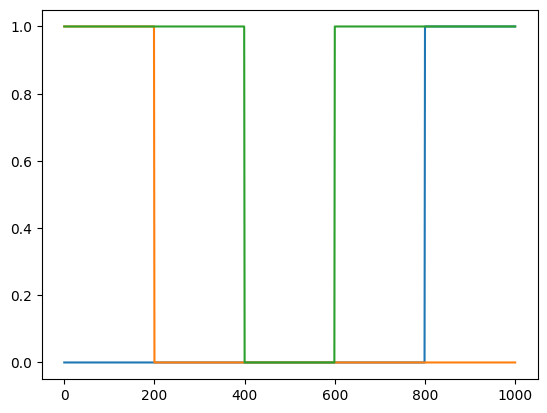

In [4]:
def highpass(data, cutoff):
    length = len(data)
    highpass = np.zeros(length)
    highpass[cutoff:] = 1
    return  highpass

def lowpass(data, cutoff):
    length = len(data)
    lowpass = np.zeros(length)
    lowpass[0:cutoff] = 1
    return lowpass

def bandpass(data, cutoff1, cutoff2):
    length = len(data)
    bandpass = np.zeros(length)
    bandpass[:cutoff1] = 1
    bandpass[cutoff2:] = 1
    return   bandpass

plt.plot(highpass(data_fft,800))
plt.plot(lowpass(data_fft,200))
plt.plot(bandpass(data_fft,400,600))

### c) Erweitere das Programm, so dass es jeweils eine Frequenz herausfiltert und das gefilterte Spektrum zur ̈ucktransformiert. 
Optimiere dabei die Frequenzfilter um die Frequenzen
klar zu sehen. Stimmen die Frequenzen und Amplituden gut mit den Werten aus dem
Frequenzspektrum  ̈uberein

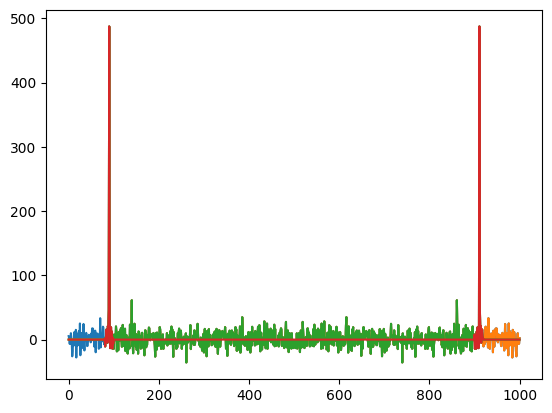

In [5]:
plt.plot(data_fft)
plt.plot(data_fft*highpass(data_fft,80))
plt.plot(data_fft*highpass(data_fft,80)*lowpass(data_fft,920))
plt.plot(data_fft*highpass(data_fft,80)*lowpass(data_fft,920)*bandpass(data_fft,100,900))

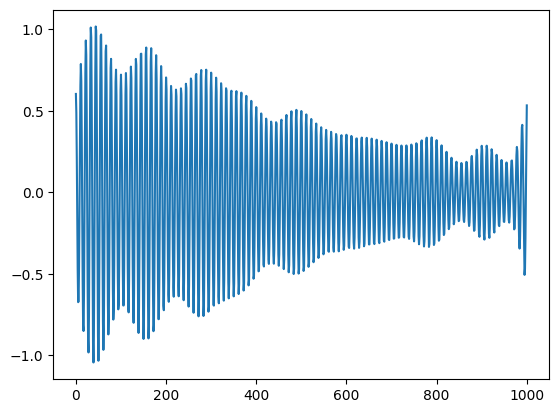

In [6]:
# left peak
plt.plot(np.fft.ifft(data_fft*highpass(data_fft,80)*lowpass(data_fft,100)))

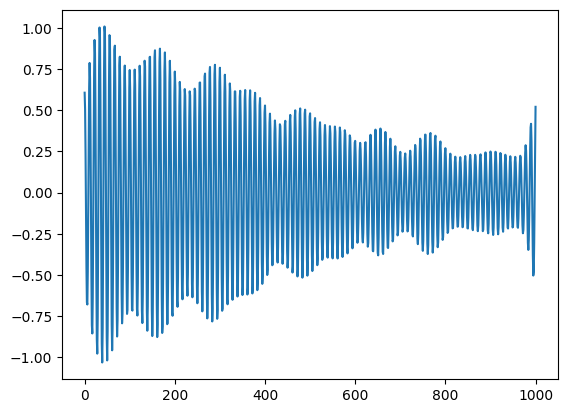

In [7]:
# right peak
plt.plot(np.fft.ifft(data_fft*highpass(data_fft,900)*lowpass(data_fft,920)))